In [49]:
from segway_control import Experiment

from scipy.integrate import solve_ivp, odeint
import numpy as np
import cvxpy as cp

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [50]:
''' Параметры системы '''
ex = Experiment()
eigA = np.linalg.eigvals(ex.A)
# eigA = eigA.astype(complex)
eigA

array([ 0.        ,  0.52145782, -2.05987963, -7.502976  ])

In [51]:
''' Время и начальные значения '''
t = (0, 20)
x0 = np.array([-0.1, -0.1, 0.1, 0.1])

In [52]:
''' Желаемые собственные числа и коэффициенты управления '''
pref_eigA = eigA.copy()
pref_eigA[0] = -1
pref_eigA[1] = -0.521
theta = ex.ackermann_control(pref_eigA)
pref_eigA, theta

(array([-1.        , -0.521     , -2.05987963, -7.502976  ]),
 array([[-894.21695576,    7.60893485, -433.21058018,   45.44297335]]))

In [53]:
''' Непрерывная линейная система '''
lin_sol = solve_ivp(ex.lin_func, t, x0, args=(theta,), method='LSODA')

In [54]:
''' Непрерывная нелинейная система '''
nonlin_sol = solve_ivp(ex.nonlin_func, t, x0, args=(theta,), method='LSODA')

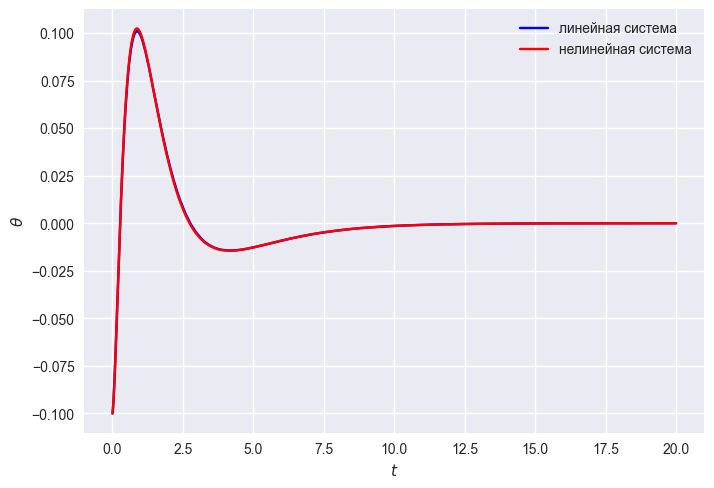

In [55]:
plt.plot(lin_sol.t, lin_sol.y[0], label='линейная система', color='blue')
plt.plot(nonlin_sol.t, nonlin_sol.y[0], label='нелинейная система', color='red')
plt.xlabel('$t$')
plt.ylabel('$\\theta$')
plt.legend()

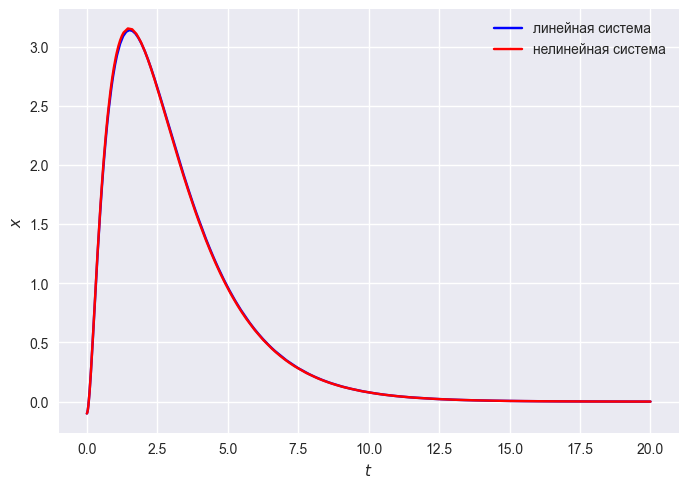

In [56]:
plt.plot(lin_sol.t, lin_sol.y[1], label='линейная система', color='blue')
plt.plot(nonlin_sol.t, nonlin_sol.y[1], label='нелинейная система', color='red')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()

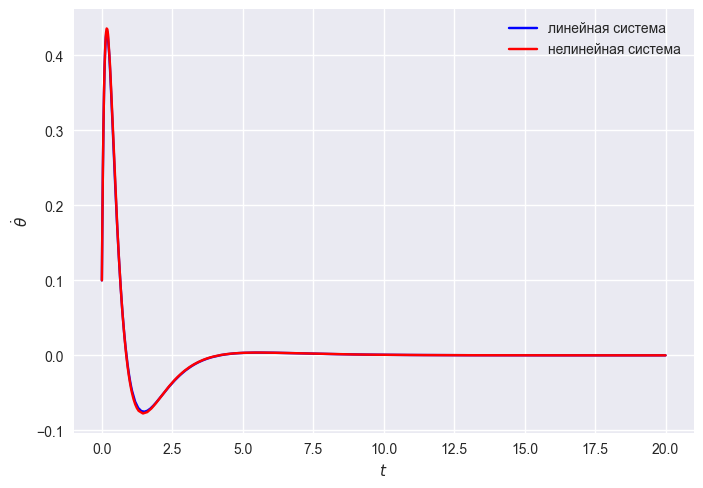

In [57]:
plt.plot(lin_sol.t, lin_sol.y[2], label='линейная система', color='blue')
plt.plot(nonlin_sol.t, nonlin_sol.y[2], label='нелинейная система', color='red')
plt.xlabel('$t$')
plt.ylabel('$\\dot{\\theta}$')
plt.legend()

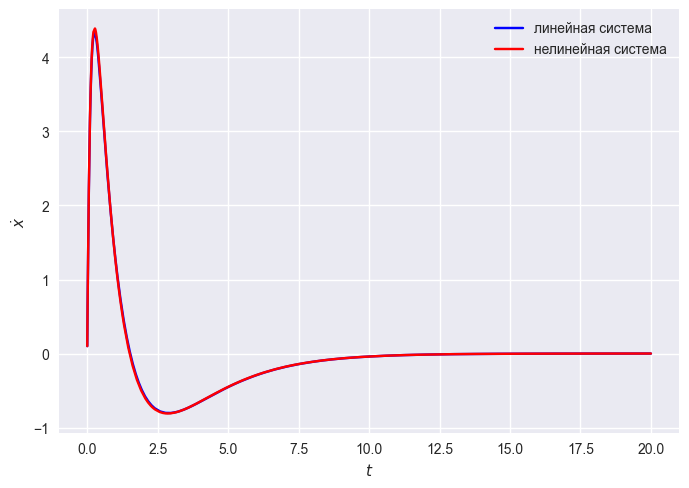

In [58]:
plt.plot(lin_sol.t, lin_sol.y[3], label='линейная система', color='blue')
plt.plot(nonlin_sol.t, nonlin_sol.y[3], label='нелинейная система', color='red')
plt.xlabel('$t$')
plt.ylabel('$\\dot{x}$')
plt.legend()